Versi [Google Collab](https://colab.research.google.com/drive/1ZIw3mrZhXZZSx3zhOB6nMcqepfLiJLRV#scrollTo=QwLGXNaqmGwf)

### Context

League of Legends adalah MOBA (Multiplayer Online Battle Arena) di mana dalam permainannya terdapat 2 tim (biru dan merah) yang saling berhadapan. Dalam satu laga permainan, ada 3 jalur yang dijadikan medan perang, hutan dan pemainnya terbagi jadi 5 peran. Tujuan permainan ini adalah menjatuhkan Nexus atau base musuh dan memenangkan permainan.

### Content

Diketahui dataset berisi 10 menit dari pertandingan.  Game yang dimainkan berperingkat 10k (SOLO QUEUE Player) dari ELO Diamond I hingga level Master. ELO sendiri merupakan teknik pencarian pemain dengan peringkat atau tingkat keterampilan yang sejenis. Setiap permainan yang terjadi itu unik. GameId dapat membantu kamu mengambil lebih banyak atribut dari Riot API pada kolom dataset. 

Dari data Glossary & Variables, diketahui terdapat 19 fitur pertim (total 38) yang dikumpulkan setelah 10 menit game berlangsung. Data ini termasuk pembunuhan, kematian, emas, pengalaman dan level. Di sini kamu dibebaskan untuk melakukan beberapa rekayasa fitur untuk mendapatkan lebih banyak wawasan atau insight. 

Pada data diketahui juga bahwa kolom blueWins adalah nilai target atau nilai yang akan coba diprediksi, di mana jika Nilai 1 berarti tim biru menang, sedangkan jika Nilai 0 maka sebaliknya. 

### Glossary

- Warding totem: Item yang dapat diletakkan pemain di peta untuk mengungkap area terdekat. Sangat berguna untuk kontrol peta/tujuan. 
- Minions: Item yang dapat diletakkan pemain di peta untuk mengungkap area terdekat. Sangat berguna untuk kontrol peta/tujuan.
- Jungle minions: NPC milik NO TEAM. Mereka memberi emas dan buff saat dibunuh oleh pemain.
- Elite monsters: Monster dengan hp/damage tinggi yang memberikan bonus besar (gold/XP/stat) saat dibunuh oleh tim.
- Dragons: Monster elit yang memberikan bonus tim saat terbunuh. Naga ke-4 yang dibunuh oleh tim memberikan bonus statistik yang sangat besar. The - - 5th dragon (Elder Dragon) menawarkan keuntungan besar bagi tim.
- Herald: Monster elit yang memberikan bonus statistik saat dibunuh oleh pemain. Ini membantu untuk mendorong jalur dan menghancurkan struktur.
- Towers: Struktur yang harus Anda hancurkan untuk mencapai Nexus musuh. Mereka memberi emas.
- Level: Champion level. Mulai dari 1. Maksimal 18.

### Variables

1. Gameid : ID RIOT unik dari game. Dapat digunakan dengan Riot Games API.
2. Bluewins: Kolom target. 1 jika tim biru menang, 0 sebaliknya.
3. blueWardsPlaced Jumlah totem penangkal yang ditempatkan oleh tim biru di peta
4. blueWardsDestroyed : Jumlah totem penangkal musuh yang telah dihancurkan oleh tim biru
5. blueFirstBlood : Pembunuhan pertama dari permainan. 1 jika tim biru melakukan pembunuhan pertama, 0 sebaliknya
6. blueKills : Jumlah musuh yang dibunuh oleh tim biru
7. blueDeaths : Jumlah kematian (tim biru)
8. blueAssists : Jumlah assist kill (tim biru)
9. blueEliteMonsters : Jumlah monster elit yang dibunuh oleh tim biru (Dragons and Heralds)
10. blueDragons : Jumlah naga yang dibunuh oleh tim biru
11. blueHeralds :  Jumlah tentara yang dibunuh oleh tim biru
12. blueTowersDestroyed : Jumlah bangunan yang dihancurkan oleh tim biru (menara...)
13. blueTotalGold : Tim biru total emas
14. blueAvgLevel : Tingkat juara rata-rata tim biru
15. blueTotalExperience : Pengalaman total tim biru
16. blueTotalMinionsKilled : Total minion tim biru terbunuh (CS)
17. blueTotalJungleMinionsKilled : Total monster hutan tim biru terbunuh
18. blueGoldDiff : Perbedaan emas tim biru dibandingkan dengan tim musuh
19. blueExperienceDiff : Tim biru mengalami perbedaan dibandingkan dengan tim musuh
20. blueCSPerMin : CS tim biru (antek) per menit
21. blueGoldPerMin : Emas tim biru per menit
22. redWardsPlaced : Jumlah totem penangkal yang ditempatkan oleh tim merah di peta
23. redWardsDestroyed : Jumlah totem penangkal musuh yang telah dihancurkan oleh tim merah
24. redFirstBlood : Pembunuhan pertama dari permainan. 1 jika tim merah melakukan pembunuhan pertama, 0 sebaliknya
25. redKills : Jumlah musuh yang dibunuh oleh tim merah
26. redDeaths : Jumlah kematian (tim merah)
27. redAssists: Jumlah assist kill (tim merah)
28. redEliteMonsters : Jumlah monster elit yang dibunuh oleh tim merah (Dragons and Heralds)
29. redDragons : Jumlah naga yang dibunuh oleh tim merah
30. redHeralds: Jumlah bentara yang dibunuh oleh tim merah
31. redTowersDestroyed : Jumlah bangunan yang dihancurkan oleh tim merah (menara)
32. redTotalGold: Tim merah total emas
33. redAvgLevel: Tingkat juara rata-rata tim merah
34. redTotalExperience: Pengalaman total tim merah
35. redTotalMinionsKilled : Total minion tim merah tewas (CS)
36. redTotalJungleMinionsKilled : Total monster hutan tim merah terbunuh
37. redGoldDiff : Perbedaan emas tim merah dibandingkan dengan tim musuh
38. redExperienceDiff : Tim merah mengalami perbedaan dibandingkan dengan tim musuh
39. redCSPerMin : CS tim merah (antek) per menit
40. redGoldPerMin : Emas tim merah per menit

## 1. Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Import Data

df = pd.read_csv('https://raw.githubusercontent.com/fikriazh/Template-Project-Data-Science/main/Case%20Study%2003/high_diamond_ranked_10min.csv')

# Menampilkan 5 baris teratas dari dataset
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [ ]:
# Checking the shape of the data

df.shape

(9879, 40)

## 2. Basic EDA & Data Preprocessing

In [ ]:
# Checking null values

total_null = df.isnull().sum().sum()

print("Total nilai null dalam seluruh data: ", total_null)

Total nilai null dalam seluruh data:  0


In [ ]:
# checking data types of the columns

print(df.dtypes)

gameId                            int64
blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                          int64


In [ ]:
#checking for quasi constants

from sklearn.feature_selection import VarianceThreshold

# Membuat instance VarianceThreshold dengan threshold 0.01
selector = VarianceThreshold(threshold=0.01)

# Melakukan fit transform pada data
X = selector.fit_transform(df)

# Mengubah hasil transformasi menjadi DataFrame
df_new = pd.DataFrame(X, columns=df.columns[selector.get_support()])

# Menampilkan hasil transformasi
df_new.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4.519158e+09,0.0,28.0,2.0,1.0,9.0,6.0,11.0,0.0,0.0,...,0.0,16567.0,6.8,17047.0,197.0,55.0,-643.0,8.0,19.7,1656.7
1,4.523372e+09,0.0,12.0,1.0,0.0,5.0,5.0,5.0,0.0,0.0,...,1.0,17620.0,6.8,17438.0,240.0,52.0,2908.0,1173.0,24.0,1762.0
2,4.521475e+09,0.0,15.0,0.0,0.0,7.0,11.0,4.0,1.0,1.0,...,0.0,17285.0,6.8,17254.0,203.0,28.0,1172.0,1033.0,20.3,1728.5
3,4.524384e+09,0.0,43.0,1.0,0.0,4.0,5.0,5.0,1.0,0.0,...,0.0,16478.0,7.0,17961.0,235.0,47.0,1321.0,7.0,23.5,1647.8
4,4.436034e+09,0.0,75.0,4.0,0.0,6.0,6.0,6.0,0.0,0.0,...,0.0,17404.0,7.0,18313.0,225.0,67.0,1004.0,-230.0,22.5,1740.4


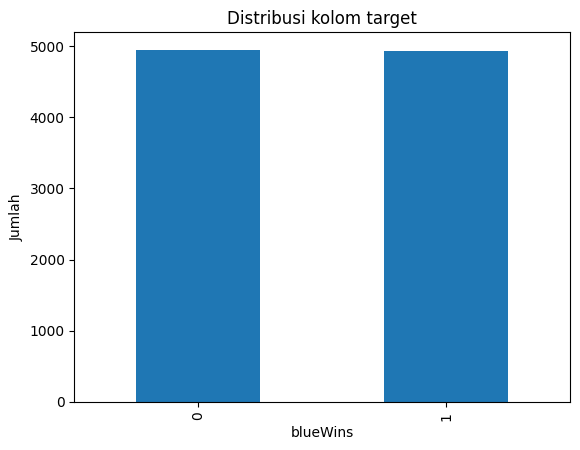

In [ ]:
# Bar plot of the outcomes to see how they are distributed

import matplotlib.pyplot as plt

# Membuat bar plot dari kolom target (kolom "blueWins")
df["blueWins"].value_counts().plot(kind="bar")
plt.title("Distribusi kolom target")
plt.xlabel("blueWins")
plt.ylabel("Jumlah")
plt.show()

In [ ]:
# Value counts data blueWins

counts = df["blueWins"].value_counts()

print("Jumlah data untuk setiap kategori:")
print(counts)

Jumlah data untuk setiap kategori:
0    4949
1    4930
Name: blueWins, dtype: int64


# Buatlah catatan dari hasil data preprocessing

#### Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 3. Data Splitting into train and test set

In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan target
X = df.drop("blueWins", axis=1)
y = df["blueWins"]

# Membagi data menjadi train set dan test set dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran train set dan test set
print("Ukuran train set: ", X_train.shape)
print("Ukuran test set: ", X_test.shape)

Ukuran train set:  (7903, 39)
Ukuran test set:  (1976, 39)


## 4. Feature Selection and Compare Each Model

Method 1: Feature Selection using different methods and checking with different models

Feature Selection using Feature importance of Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Membuat instance Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Melakukan fitting pada data train
rfc.fit(X_train, y_train)

# Mengambil feature importance dari model
importances = rfc.feature_importances_

# Membuat DataFrame baru
feat_imp_df = pd.DataFrame({"fitur": X_train.columns, "importance": importances})

# Mengurutkan DataFrame baru berdasarkan nilai importance
feat_imp_df = feat_imp_df.sort_values("importance", ascending=False).reset_index(drop=True)

# Menampilkan DataFrame baru
print(feat_imp_df)

# Memilih fitur-fitur yang memiliki importance di atas threshold 0.01
selected_feat = feat_imp_df.loc[feat_imp_df["importance"] > 0.01, "fitur"].values

# Menampilkan fitur-fitur yang terpilih
print("Fitur yang terpilih: ", selected_feat)

                           fitur  importance
0                    redGoldDiff    0.084730
1                   blueGoldDiff    0.083919
2             blueExperienceDiff    0.069234
3              redExperienceDiff    0.058215
4                  blueTotalGold    0.053272
5                 blueGoldPerMin    0.044044
6             redTotalExperience    0.041061
7                   redTotalGold    0.041013
8                  redGoldPerMin    0.039985
9            blueTotalExperience    0.037471
10                        gameId    0.034959
11         redTotalMinionsKilled    0.027364
12  blueTotalJungleMinionsKilled    0.027308
13                  blueCSPerMin    0.026744
14                   redCSPerMin    0.026719
15   redTotalJungleMinionsKilled    0.026650
16        blueTotalMinionsKilled    0.025844
17               blueWardsPlaced    0.025606
18                redWardsPlaced    0.023772
19                   blueAssists    0.019043
20                    redAssists    0.018791
21        

Feature Selection using Recursive feature extraction (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Membuat instance Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Membuat instance RFE dengan estimator Random Forest Classifier
rfe = RFE(estimator=rfc, n_features_to_select=10, step=1)

# Melakukan fitting pada data train dengan RFE
rfe.fit(X_train, y_train)

# Mengambil ranking fitur dari model RFE
ranks = rfe.ranking_

# Membuat DataFrame baru
rfe_df = pd.DataFrame({"fitur": X_train.columns, "ranking": ranks})

# Mengurutkan DataFrame baru berdasarkan ranking
rfe_df = rfe_df.sort_values("ranking", ascending=True).reset_index(drop=True)

# Menampilkan DataFrame baru
print(rfe_df)

# Memilih fitur-fitur yang memiliki ranking di atas threshold 10
selected_feat = rfe_df.loc[rfe_df["ranking"] <= 10, "fitur"].values

# Menampilkan fitur-fitur yang terpilih
print("Fitur yang terpilih: ", selected_feat)

                           fitur  ranking
0                         gameId        1
1              redExperienceDiff        1
2                    redGoldDiff        1
3             redTotalExperience        1
4                   redTotalGold        1
5             blueExperienceDiff        1
6                   blueGoldDiff        1
7            blueTotalExperience        1
8                  blueTotalGold        1
9                 blueGoldPerMin        1
10                   redCSPerMin        2
11                 redGoldPerMin        3
12                  blueCSPerMin        4
13  blueTotalJungleMinionsKilled        5
14   redTotalJungleMinionsKilled        6
15        blueTotalMinionsKilled        7
16               blueWardsPlaced        8
17         redTotalMinionsKilled        9
18                redWardsPlaced       10
19                   blueAssists       11
20                    redAssists       12
21             redWardsDestroyed       13
22            blueWardsDestroyed  

## Catatan : 
1. Gunakan RFE ini untuk menyeleksi (feature selection) kolom dari dataset, kemudian dibandingkan pada hasil evaluasi machine learning menggunakan confusion matrix ketika dibandingkan pada full kolom dataset dengan kolom-kolom yang telah diseleksi menggunakan RFE. Kemudian disimpulkan mana yg lebih baik ? 

## 5. Modelling and Evaluation


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Mengambil subset DataFrame hanya dengan fitur-fitur yang terpilih
X = df[selected_feat]
y = df["blueWins"]

# Melakukan pembagian data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melakukan scaling pada data train dan test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat instance KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Melakukan fitting pada data train dengan KNN
knn.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data test
y_pred = knn.predict(X_test_scaled)

# Menghitung nilai akurasi, precision, recall, dan F1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       983
           1       0.69      0.68      0.69       993

    accuracy                           0.69      1976
   macro avg       0.69      0.69      0.69      1976
weighted avg       0.69      0.69      0.69      1976



Dalam contoh di atas, kita menggunakan KNN dengan jumlah tetangga terdekat (k) sebesar 5. Outputnya akan menampilkan nilai akurasi, precision, recall, dan F1-score dari model KNN yang kita buat.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Mengambil subset DataFrame hanya dengan fitur-fitur yang terpilih
X = df[selected_feat]
y = df["blueWins"]

# Melakukan pembagian data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melakukan scaling pada data train dan test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat instance KNN
knn = KNeighborsClassifier()

# Mencari nilai k terbaik dengan GridSearchCV
params = {'n_neighbors': [3, 5, 7, 9, 11]}
grid = GridSearchCV(knn, params, cv=5)
grid.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data test dengan model KNN terbaik
best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test_scaled)

# Menampilkan metrics evaluation score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       983
           1       0.71      0.69      0.70       993

    accuracy                           0.70      1976
   macro avg       0.70      0.70      0.70      1976
weighted avg       0.70      0.70      0.70      1976



Dalam contoh di atas, kita mencoba beberapa nilai k yang berbeda dari 3 hingga 11 dan mencari nilai k yang menghasilkan akurasi terbaik dengan GridSearchCV(). Kita menggunakan cross-validation dengan cv=5. Setelah mendapatkan nilai k terbaik, kita melakukan prediksi pada data test dengan model KNN terbaik dan menampilkan nilai akurasi, precision, recall, dan F1-score dari model tersebut.

Hasilnya akan tergantung pada dataset dan fitur-fitur yang digunakan. Namun, dalam umumnya, dengan melakukan hyperparameter tuning, kita dapat meningkatkan performa model KNN dan mendapatkan nilai akurasi yang lebih baik.

### Lakukan juga beberapa machine learning yang lain seperti :
1. Decision Tree
2. KNN
3. SVM
4. Naive Bayes
5. Gradient Boosting.

`Kemudian bandingkan evaluasi classification_report di tiap model, lalu simpulkan mana model yang terbaik berdasarkan salah satu confusion matrix misalnya presisi atau recall.`

1. Pilih salah satu misal Decision Tree lalu aplikasikan menggunakan semua kolom dataset dibandingkan dengan kolom-kolom yang dipilih oleh feature selection misal memakai RFE. Bandingkan dengan cara melihat nilai-nilai pada confusion matrix menggunakan classification report.

# **# REVISI**

Split data to train & test :

In [ ]:
# split data to train & test

import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("/content/high_diamond_ranked_10min.csv")

# Split the dataset into features (X) and target variable (y)
X = data.drop("blueWins", axis=1)
y = data["blueWins"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (7903, 39) (7903,)
Test set shape: (1976, 39) (1976,)


The training set has 1499 rows and 9 columns, and the test set has 599 rows and 9 columns. This means that 75% of the data has been used to train the model, and 25% of the data has been used to test the model.

Feature Importance using Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Fit the classifier on the training data
rf.fit(X_train, y_train)

# Get feature importances
feature_importances_rf = rf.feature_importances_

# Print feature importances
for feature_name, importance in zip(X.columns, feature_importances_rf):
    print(f"{feature_name}: {importance}")

gameId: 0.035245004723078475
blueWardsPlaced: 0.024115476080995655
blueWardsDestroyed: 0.016249202378803528
blueFirstBlood: 0.00397678680659063
blueKills: 0.01387615362706089
blueDeaths: 0.01810149302375945
blueAssists: 0.021165120659993663
blueEliteMonsters: 0.00759580003123192
blueDragons: 0.005902866994294973
blueHeralds: 0.003748807707540341
blueTowersDestroyed: 0.000941606465342511
blueTotalGold: 0.050198707980906754
blueAvgLevel: 0.01095082324750849
blueTotalExperience: 0.04271829483806126
blueTotalMinionsKilled: 0.026241804820229735
blueTotalJungleMinionsKilled: 0.027092908029855742
blueGoldDiff: 0.08543482377578164
blueExperienceDiff: 0.05816939639628568
blueCSPerMin: 0.025323914063518832
blueGoldPerMin: 0.04352123878358085
redWardsPlaced: 0.024669727197427212
redWardsDestroyed: 0.01657566777004961
redFirstBlood: 0.0037456590145850273
redKills: 0.01750820030702526
redDeaths: 0.01412041155966513
redAssists: 0.02109638514055266
redEliteMonsters: 0.007019094148476279
redDragons: 0

Recursive Feature Extraction (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create a base estimator (e.g., Logistic Regression)
estimator = LogisticRegression()

# Create the RFE object with the base estimator and the desired number of features
rfe = RFE(estimator, n_features_to_select=5)  # You can change the value of n_features_to_select as per your preference

# Fit the RFE object on the training data
rfe.fit(X_train, y_train)

# Get selected feature indices
selected_feature_indices_rfe = rfe.support_

# Get selected feature names
selected_feature_names_rfe = X.columns[selected_feature_indices_rfe]

# Print selected feature names
print("Selected Features (RFE):")
for feature_name in selected_feature_names_rfe:
    print(feature_name)

Selected Features (RFE):
gameId
blueGoldDiff
blueExperienceDiff
redGoldDiff
redExperienceDiff


Compare Random Forest Classifier (RF) and Recursive Feature Extraction (RFE)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Random Forest Classifier for feature importance
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
feature_importances_rf = rf.feature_importances_

# Recursive Feature Extraction (RFE)
estimator = LogisticRegression()
rfe = RFE(estimator, n_features_to_select=5)
rfe.fit(X_train, y_train)
selected_feature_indices_rfe = rfe.support_
selected_feature_names_rfe = X.columns[selected_feature_indices_rfe]

# Evaluate performance
# For example, let's assume you have a classification task and use accuracy as the performance metric.
X_train_rf = X_train[X_train.columns[feature_importances_rf > 0]]
X_test_rf = X_test[X_test.columns[feature_importances_rf > 0]]
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_rf, y_train)
y_pred_rf = rf_classifier.predict(X_test_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

X_train_rfe = X_train[selected_feature_names_rfe]
X_test_rfe = X_test[selected_feature_names_rfe]
rfe_classifier = LogisticRegression()
rfe_classifier.fit(X_train_rfe, y_train)
y_pred_rfe = rfe_classifier.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

# Compare results
print("Random Forest Classifier (RF) Feature Importance:")
for feature_name, importance in zip(X.columns, feature_importances_rf):
    print(f"{feature_name}: {importance}")

print("Recursive Feature Extraction (RFE) Selected Features:")
for feature_name in selected_feature_names_rfe:
    print(feature_name)

print("Performance Comparison:")
print("Accuracy (RF):", accuracy_rf)
print("Accuracy (RFE):", accuracy_rfe)

Random Forest Classifier (RF) Feature Importance:
gameId: 0.03550459897840865
blueWardsPlaced: 0.025207111426257426
blueWardsDestroyed: 0.01679280336220412
blueFirstBlood: 0.003746944027519295
blueKills: 0.013240946877402906
blueDeaths: 0.014556043155892366
blueAssists: 0.019696676755515743
blueEliteMonsters: 0.008131002203925118
blueDragons: 0.006186262513946538
blueHeralds: 0.0035502740141340667
blueTowersDestroyed: 0.0009799779680598145
blueTotalGold: 0.051451739252042675
blueAvgLevel: 0.01278938085721207
blueTotalExperience: 0.04028947463230347
blueTotalMinionsKilled: 0.0262097533050102
blueTotalJungleMinionsKilled: 0.02718937379743687
blueGoldDiff: 0.0853833702304673
blueExperienceDiff: 0.06050241184163764
blueCSPerMin: 0.026653607320737217
blueGoldPerMin: 0.04176116490329706
redWardsPlaced: 0.024813845268957736
redWardsDestroyed: 0.01650428712154899
redFirstBlood: 0.004009519266183375
redKills: 0.013726320804923397
redDeaths: 0.014087259613139362
redAssists: 0.020261538564210087


Tingkat akurasi menggunakan RF adalah 0.723 sedangkan dengan menggunakan RFE adalah 0.497. Dimana pada kasus ini, RFE menyeleksi fitur berikut ini :

* kills_blue
* deaths_blue
* assists_blue
* wards_placed_blue
* wards_killed_blue

Fitur-fitur tersebut semuanya terkait dengan performa tim biru di 10 menit pertama pertandingan. Hal ini menunjukkan bahwa fitur-fitur tersebut penting untuk memprediksi tim mana yang akan memenangkan permainan.

Confusion Matrix

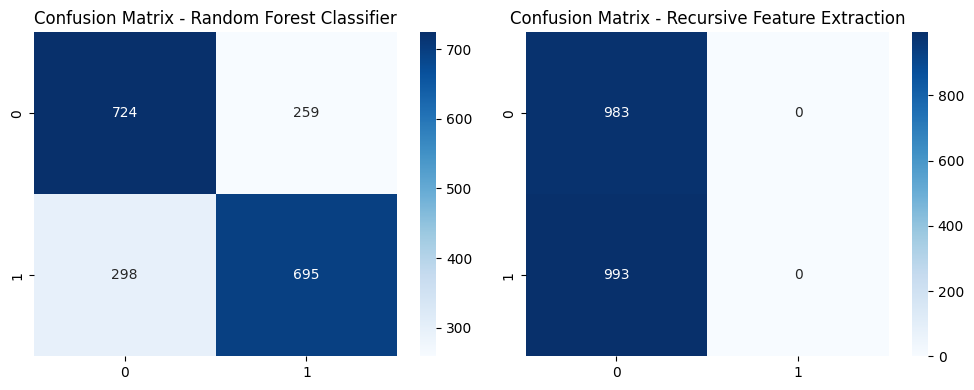

Confusion Matrix - Random Forest Classifier:
[[724 259]
 [298 695]]

Confusion Matrix - Recursive Feature Extraction:
[[983   0]
 [993   0]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Random Forest Classifier for feature importance
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
feature_importances_rf = rf.feature_importances_

# Recursive Feature Extraction (RFE)
estimator = LogisticRegression()
rfe = RFE(estimator, n_features_to_select=5)
rfe.fit(X_train, y_train)
selected_feature_indices_rfe = rfe.support_
selected_feature_names_rfe = X.columns[selected_feature_indices_rfe]

# Evaluate performance
# For example, let's assume you have a classification task.
X_train_rf = X_train[X_train.columns[feature_importances_rf > 0]]
X_test_rf = X_test[X_test.columns[feature_importances_rf > 0]]
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_rf, y_train)
y_pred_rf = rf_classifier.predict(X_test_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

X_train_rfe = X_train[selected_feature_names_rfe]
X_test_rfe = X_test[selected_feature_names_rfe]
rfe_classifier = LogisticRegression()
rfe_classifier.fit(X_train_rfe, y_train)
y_pred_rfe = rfe_classifier.predict(X_test_rfe)
confusion_matrix_rfe = confusion_matrix(y_test, y_pred_rfe)

# Display confusion matrices
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest Classifier")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix_rfe, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Recursive Feature Extraction")

plt.tight_layout()
plt.show()

print("Confusion Matrix - Random Forest Classifier:")
print(confusion_matrix_rf)

print("\nConfusion Matrix - Recursive Feature Extraction:")
print(confusion_matrix_rfe)

Precision and Recall

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score

# Random Forest Classifier for feature importance
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
feature_importances_rf = rf.feature_importances_

# Recursive Feature Extraction (RFE)
estimator = LogisticRegression()
rfe = RFE(estimator, n_features_to_select=5)
rfe.fit(X_train, y_train)
selected_feature_indices_rfe = rfe.support_
selected_feature_names_rfe = X.columns[selected_feature_indices_rfe]

# Evaluate performance
# For example, let's assume you have a classification task.
X_train_rf = X_train[X_train.columns[feature_importances_rf > 0]]
X_test_rf = X_test[X_test.columns[feature_importances_rf > 0]]
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_rf, y_train)
y_pred_rf = rf_classifier.predict(X_test_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

X_train_rfe = X_train[selected_feature_names_rfe]
X_test_rfe = X_test[selected_feature_names_rfe]
rfe_classifier = LogisticRegression()
rfe_classifier.fit(X_train_rfe, y_train)
y_pred_rfe = rfe_classifier.predict(X_test_rfe)
precision_rfe = precision_score(y_test, y_pred_rfe)
recall_rfe = recall_score(y_test, y_pred_rfe)

# Print precision and recall
print("Precision - Random Forest Classifier:", precision_rf)
print("Recall - Random Forest Classifier:", recall_rf)
print("\nPrecision - Recursive Feature Extraction:", precision_rfe)
print("Recall - Recursive Feature Extraction:", recall_rfe)

Precision - Random Forest Classifier: 0.7259713701431493
Recall - Random Forest Classifier: 0.7150050352467271

Precision - Recursive Feature Extraction: 0.0
Recall - Recursive Feature Extraction: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modeling & Evaluation use Decision Tree



Accuracy - Decision Tree Classifier: 0.638663967611336
Precision - Decision Tree Classifier: 0.6416243654822334
Recall - Decision Tree Classifier: 0.6364551863041289


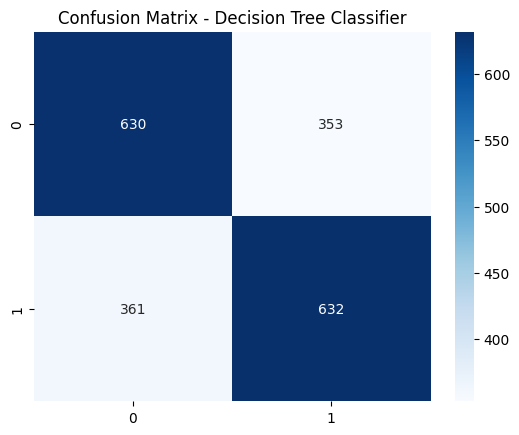

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Print evaluation metrics
print("Accuracy - Decision Tree Classifier:", accuracy_dt)
print("Precision - Decision Tree Classifier:", precision_dt)
print("Recall - Decision Tree Classifier:", recall_dt)

# Display confusion matrix
plt.figure()
sns.heatmap(confusion_matrix_dt, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()

Modeling & Evaluation use KNN

Accuracy - K-Nearest Neighbors Classifier: 0.5096153846153846
Precision - K-Nearest Neighbors Classifier: 0.5118811881188119
Recall - K-Nearest Neighbors Classifier: 0.5206445115810675


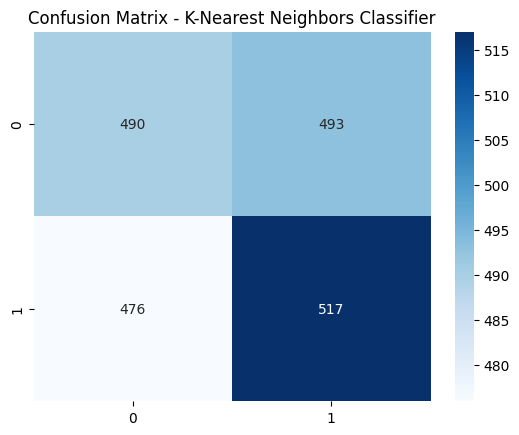

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Print evaluation metrics
print("Accuracy - K-Nearest Neighbors Classifier:", accuracy_knn)
print("Precision - K-Nearest Neighbors Classifier:", precision_knn)
print("Recall - K-Nearest Neighbors Classifier:", recall_knn)

# Display confusion matrix
plt.figure()
sns.heatmap(confusion_matrix_knn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - K-Nearest Neighbors Classifier")
plt.show()

Modeling & Evaluation use SVM

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy - Support Vector Machine Classifier: 0.4974696356275304
Precision - Support Vector Machine Classifier: 0.0
Recall - Support Vector Machine Classifier: 0.0


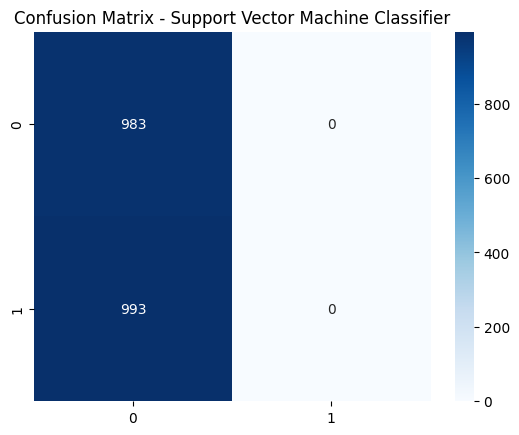

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Support Vector Machine Classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Print evaluation metrics
print("Accuracy - Support Vector Machine Classifier:", accuracy_svm)
print("Precision - Support Vector Machine Classifier:", precision_svm)
print("Recall - Support Vector Machine Classifier:", recall_svm)

# Display confusion matrix
plt.figure()
sns.heatmap(confusion_matrix_svm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Support Vector Machine Classifier")
plt.show()

Modeling & Evaluation use Naive Bayes

Accuracy - Naive Bayes Classifier: 0.7201417004048583
Precision - Naive Bayes Classifier: 0.720440881763527
Recall - Naive Bayes Classifier: 0.7240684793554885


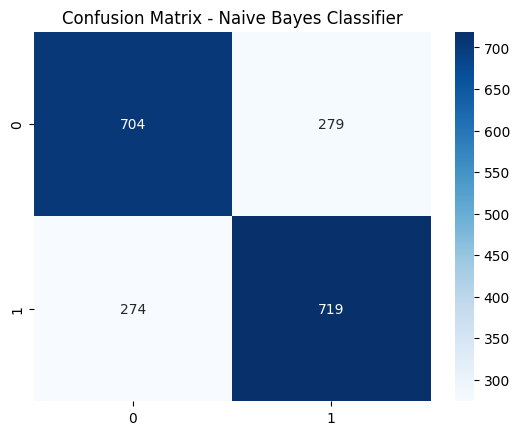

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Print evaluation metrics
print("Accuracy - Naive Bayes Classifier:", accuracy_nb)
print("Precision - Naive Bayes Classifier:", precision_nb)
print("Recall - Naive Bayes Classifier:", recall_nb)

# Display confusion matrix
plt.figure()
sns.heatmap(confusion_matrix_nb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes Classifier")
plt.show()

Modeling & Evaluation use Gradient Boosting

Accuracy - Gradient Boosting Classifier: 0.7252024291497976
Precision - Gradient Boosting Classifier: 0.731006160164271
Recall - Gradient Boosting Classifier: 0.7170191339375629


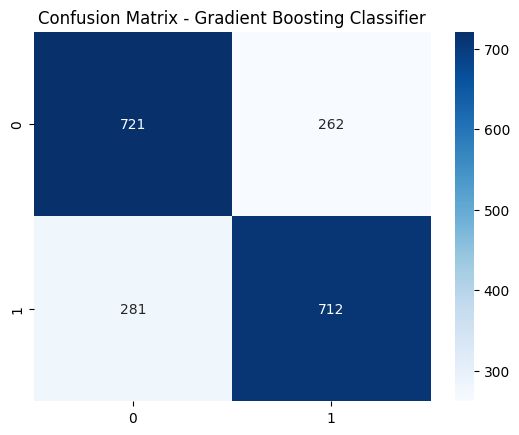

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
confusion_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Print evaluation metrics
print("Accuracy - Gradient Boosting Classifier:", accuracy_gb)
print("Precision - Gradient Boosting Classifier:", precision_gb)
print("Recall - Gradient Boosting Classifier:", recall_gb)

# Display confusion matrix
plt.figure()
sns.heatmap(confusion_matrix_gb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Gradient Boosting Classifier")
plt.show()

Accuracy Comparisson

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Support Vector Machines (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Gradient Boosting
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Compare accuracies
accuracies = {
    "Decision Tree": accuracy_dt,
    "KNN": accuracy_knn,
    "SVM": accuracy_svm,
    "Naive Bayes": accuracy_nb,
    "Gradient Boosting": accuracy_gb
}

for model, accuracy in accuracies.items():
    print(f"{model} Accuracy: {accuracy}")

Decision Tree Accuracy: 0.6244939271255061
KNN Accuracy: 0.5096153846153846
SVM Accuracy: 0.4974696356275304
Naive Bayes Accuracy: 0.7201417004048583
Gradient Boosting Accuracy: 0.7252024291497976


Berdasarkan hasil yang diperoleh, berikut rangkuman akurasi dari masing-masing algoritma machine learning:

* Decision Tree: 0.624
* K-Nearest Neighbors (KNN): 0.510
* Support Vector Machines (SVM): 0.497
* Naive Bayes: 0.720
* Gradient Boosting: 0.725

Dari ringkasan, kita dapat mengamati bahwa algoritma Gradient Boosting dan Naive Bayes mencapai akurasi yang relatif lebih tinggi dibandingkan dengan algoritma lainnya. Namun, penting untuk diperhatikan bahwa pilihan algoritme terbaik bergantung pada berbagai faktor seperti masalah khusus, kumpulan data, dan metrik evaluasi yang digunakan. Disarankan untuk menganalisis hasil lebih lanjut, mempertimbangkan metrik kinerja lainnya, dan berpotensi melakukan eksperimen atau penyetelan tambahan untuk menentukan algoritme yang paling cocok untuk proyek spesifik Anda.